In [1]:
import io
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')
plt.rcParams["font.family"] = "sans-serif"

In [2]:
datafile_AMT = '../data/MTurk_anonymous.xlsx'
datafile_DTU1 = '../data/DTU1_anonymous.xlsx'
datafile_DTU2 = '../data/DTU2_anonymous.xlsx'
df_AMT = pd.DataFrame(pd.read_excel(datafile_AMT))
df_DTU1 = pd.DataFrame(pd.read_excel(datafile_DTU1))
df_DTU2 = pd.DataFrame(pd.read_excel(datafile_DTU2))
df_all = pd.concat([df_AMT, df_DTU1, df_DTU2], ignore_index=True)
df_all = df_all[['round','arrival', 'choice']]
df_all.head()

,round,arrival,choice
0,1,8.2,1
1,1,8.3,1
2,2,8.2,0
3,2,8.1,1
4,3,8.2,1


get the total number of choices for each arrival time each round:

In [3]:
df_tot = df_all.groupby(['arrival', 'round'])['choice'].size().unstack(level=0).fillna(0)
df_tot.head()

arrival,8.0,8.1,8.2,8.3,8.4,8.5,9.0,9.1
round,,,,,,,,
1,50,112,121,119,113,114,117,56
2,65,123,101,88,101,119,134,71
3,48,98,111,115,105,113,110,48
4,47,93,97,91,84,79,83,48
5,44,80,88,98,79,60,65,38


and also get the number of canteen/office choices for each arrival time and round:

In [4]:
df1 = df_all.groupby(['arrival', 'round'])['choice'].value_counts().unstack(level=0).fillna(0)
df1.head()

arrival        8.0    8.1    8.2    8.3    8.4   8.5    9.0   9.1
round choice                                                     
1     0        7.0    5.0    9.0    7.0    9.0  46.0   88.0  46.0
      1       43.0  107.0  112.0  112.0  104.0  68.0   29.0  10.0
2     0        3.0   16.0   10.0   11.0   14.0  62.0  117.0  58.0
      1       62.0  107.0   91.0   77.0   87.0  57.0   17.0  13.0
3     0        7.0    8.0   11.0   12.0    9.0  49.0   98.0  40.0

select only the canteen choices:

In [5]:
dfc = df1.iloc[df1.index.get_level_values(1) == 1.0].droplevel(level=1)  # these are the canteen choices
dfc.head()

arrival,8.0,8.1,8.2,8.3,8.4,8.5,9.0,9.1
round,,,,,,,,
1,43.0,107.0,112.0,112.0,104.0,68.0,29.0,10.0
2,62.0,107.0,91.0,77.0,87.0,57.0,17.0,13.0
3,41.0,90.0,100.0,103.0,96.0,64.0,12.0,8.0
4,41.0,85.0,91.0,84.0,76.0,37.0,14.0,4.0
5,43.0,78.0,85.0,91.0,70.0,27.0,11.0,5.0


Now we get the frequency of going to the canteen for each arrival time/round by simply dividing dfc with df_tot:

In [7]:
df = dfc/df_tot
df.head()

arrival,8.0,8.1,8.2,8.3,8.4,8.5,9.0,9.1
round,,,,,,,,
1,0.860000,0.955357,0.925620,0.941176,0.920354,0.596491,0.247863,0.178571
2,0.953846,0.869919,0.900990,0.875000,0.861386,0.478992,0.126866,0.183099
3,0.854167,0.918367,0.900901,0.895652,0.914286,0.566372,0.109091,0.166667
4,0.872340,0.913978,0.938144,0.923077,0.904762,0.468354,0.168675,0.083333
5,0.977273,0.975000,0.965909,0.928571,0.886076,0.450000,0.169231,0.131579


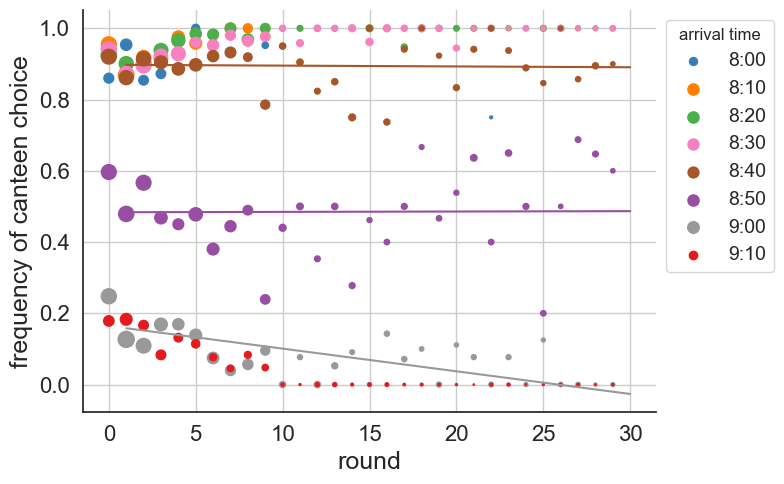

In [13]:
# colors taken from https://gist.github.com/thriveth/8560036

x = np.arange(float(len(dfc)))
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, df[8], s=df_tot[8].values, marker='o', color='#377eb8', label='8:00')
ax.scatter(x, df[8.1], s=df_tot[8.1].values, marker='o', color='#ff7f00', label='8:10')
ax.scatter(x, df[8.2], s=df_tot[8.2].values, marker='o', color='#4daf4a', label='8:20')
ax.scatter(x, df[8.3], s=df_tot[8.3].values, marker='o', color='#f781bf', label='8:30')
ax.scatter(x, df[8.4], s=df_tot[8.4].values, marker='o', color='#a65628', label='8:40')
ax.scatter(x, df[8.5], s=df_tot[8.5].values, marker='o', color='#984ea3', label='8:50')
ax.scatter(x, df[9], s=df_tot[9].values, marker='o', color='#999999', label='9:00')
ax.scatter(x, df[9.1], s=df_tot[9.1].values, marker='o', color='#e41a1c', label='9:10')
ax.plot(x+1, np.poly1d(np.polyfit(x+1, df[8.5].values, 1,
        w=np.sqrt(df_tot[8.5].values)))(x+1), color='#984ea3')#, label='WLS')
ax.plot(x+1, np.poly1d(np.polyfit(x+1, df[8.4].values, 1,
        w=np.sqrt(df_tot[8.4].values)))(x+1), color='#a65628')
ax.plot(x+1, np.poly1d(np.polyfit(x+1, df[9].values, 1,
        w=np.sqrt(df_tot[9].values)))(x+1), color='#999999')

plt.ylabel('frequency of canteen choice', fontsize=18)
plt.xlabel('round', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
handles, _ = ax.get_legend_handles_labels()
labels = ['8:00', '8:10','8:20','8:30','8:40','8:50','9:00','9:10', 'WLS']

# bruger np.roll til at placere WLS nederst:
lgd = ax.legend(np.roll(handles,8), labels, title='arrival time', fontsize=14, prop={'size': 14}, bbox_to_anchor=(1, 1))
#lgd.legendHandles[7].set_color('grey')
plt.grid()
plt.tight_layout()

# Remember: save as pdf and transparent=True for Adobe Illustrator
PLOTS_DIR = '../plots'

if not os.path.exists(PLOTS_DIR):
    os.makedirs(PLOTS_DIR)

plt.savefig(os.path.join(PLOTS_DIR, 'fig4.png'), bbox_extra_artists=(lgd,), bbox_inches='tight', transparent=True, dpi=300)
#plt.savefig(os.path.join(PLOTS_DIR, 'fig4_timeseries1.pdf'), bbox_extra_artists=(lgd,), bbox_inches='tight', transparent=True, dpi=300)
sns.despine()